### Задание 1

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import manifold
from sklearn.datasets import load_boston

In [96]:
boston = load_boston()

In [97]:
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [102]:
tsne = sklearn.manifold.TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(scaled_X_train)

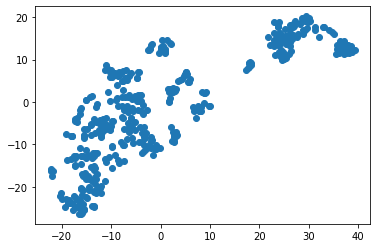

In [103]:
plt.scatter(tsne[:,0], tsne[:,1])

### Задание 2

In [104]:
from sklearn.cluster import KMeans

In [105]:
model = KMeans(max_iter=100, n_clusters=3, random_state=42)


tsne_labels = model.fit_predict(scaled_X_train)
print(tsne_labels)

Text(0.5, 1.0, 'Train data')

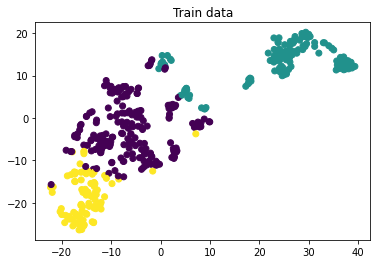

In [106]:
plt.scatter(tsne[:,0], tsne[:,1], c=tsne_labels)
plt.title('Train data')

In [107]:
print("PRICE:")
print('Кластер 0: {}'.format(y_train.loc[tsne_labels == 0].mean()))
print('Кластер 1: {}'.format(y_train.loc[tsne_labels == 1].mean()))
print('Кластер 2: {}'.format(y_train.loc[tsne_labels == 2].mean()))

PRICE:
Кластер 0: price    24.958115
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    27.788372
dtype: float64


In [108]:
print("CRIM:")
print('Кластер 0: {}'.format(X_train.loc[tsne_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[tsne_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[tsne_labels == 2, 'CRIM'].mean()))

CRIM:
Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


### Задание 3

In [109]:
tsne_labels2 = model.fit_predict(scaled_X_test)
print(tsne_labels2)

[1 2 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 2 0 1 2 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 2 1 1 0 1 1 0 1 1 2 1 1 2 0 0 2 1 1 2 2 1 1 2 1 0 1 2 0 1 0 0 2
 1 0 1 2 0 0 1 0 2 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1]


Text(0.5, 1.0, 'Train data')

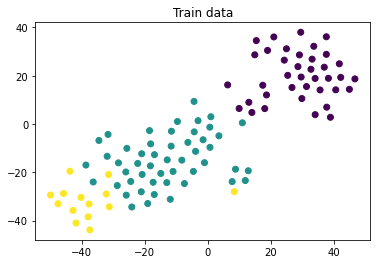

In [110]:
tsne2 = sklearn.manifold.TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(scaled_X_test)
plt.scatter(tsne2[:,0], tsne2[:,1], c=tsne_labels2)
plt.title('Train data')

In [111]:
print("PRICE:")
print('Кластер 0: {}'.format(y_test.loc[tsne_labels2 == 0].mean()))
print('Кластер 1: {}'.format(y_test.loc[tsne_labels2 == 1].mean()))
print('Кластер 2: {}'.format(y_test.loc[tsne_labels2 == 2].mean()))

PRICE:
Кластер 0: price    16.710526
dtype: float64
Кластер 1: price    21.652
dtype: float64
Кластер 2: price    33.871429
dtype: float64


In [112]:
print("CRIM:")
print('Кластер 0: {}'.format(X_test.loc[tsne_labels2 == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[tsne_labels2 == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[tsne_labels2 == 2, 'CRIM'].mean()))

CRIM:
Кластер 0: 9.419181842105264
Кластер 1: 0.2244212
Кластер 2: 0.08618571428571427
